# Homework Assignment 2
## Mindy Tran
-------------------------
As with HW 1, please turn this assignment in as a jupyter notebook. This homework will
be due next Wednesday.

**Question 1:** Using `pandas` along with the up-to-date CDC data plot 1) the number of new positive cases reported each day for California versus New York and 2) the number of new positive cases reported each day for Oregon versus Washington.  

/tmp/ipykernel_1392540/3066891236.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['new_case'][x['new_case'] < 1] = 1


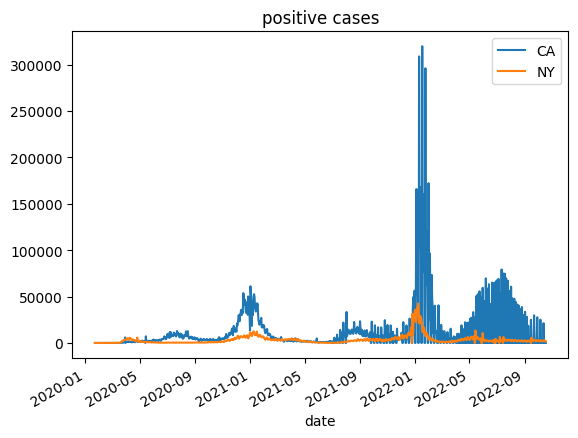

In [6]:
import pandas as pd
query = ("https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD")
x = pd.read_csv(query)

# 1) the number of new positive cases reported each day for California versus New York
x['date']=pd.to_datetime(x['submission_date'],format='%m/%d/%Y')
x.set_index(['date'],inplace=True)
x.head()

state1 = "CA"
state2 = "NY"
#clean data, replace negatives with 1
x['new_case'][x['new_case'] < 1] = 1
ax = x[x['state'] == state1]['new_case'].plot()
x[x['state'] == state2]['new_case'].plot()
ax.set_title("positive cases")
ax.legend([state1,state2])

/tmp/ipykernel_1392540/1626752381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['new_case'][x['new_case'] < 1] = 1


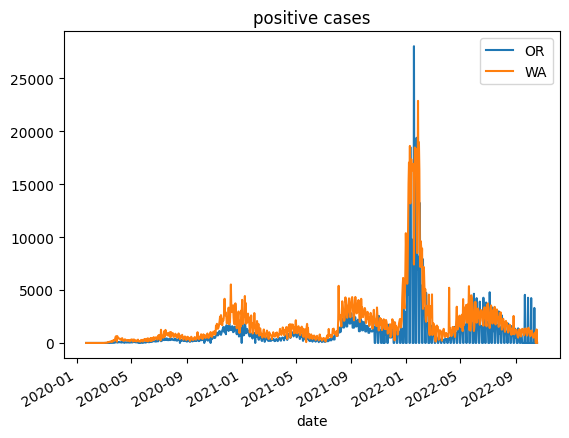

In [7]:
# 2) the number of new positive cases reported each day for Oregon versus Washington.

state1 = "OR"
state2 = "WA"
#clean data, replace negatives with 1
x['new_case'][x['new_case'] < 1] = 1
ax = x[x['state'] == state1]['new_case'].plot()
x[x['state'] == state2]['new_case'].plot()
ax.set_title("positive cases")
ax.legend([state1,state2])

**Question 2:** Tracking the progress of social distancing. In the week2 notebook we looked at how the the number of new positive cases seems to be flattening in California when comparing March 2020 to March 2021. I'm going to ask you to use similar code / thinking and do a couple comparisons.

1) On March 19th 2020 the Governor of California ordered a state-wide lockdown-- did this have an effect on the rate of transmission? To examine this, compare the data from California in the period from 03/01/2020-03/19/2020 to 03/20/2020-04/30/2020 and ask if doubling times are different. Present this in two, clearly-labelled plots, each showing log transformed counts of positive cases over time. 

2) Do the same thing for Washington state which had it's first lockdown imposed on 03/24/2020. For Washington compare 02/15/2020-03/24/2020 to 03/25/2020-04/30/2020. Did the lockdown change the rate of transmission? 

The exponential growth rate decreased and the doubling time increased after the lockdown implementation
This is supports that the state-wide lockdown did have an effect on the rate of transmission.


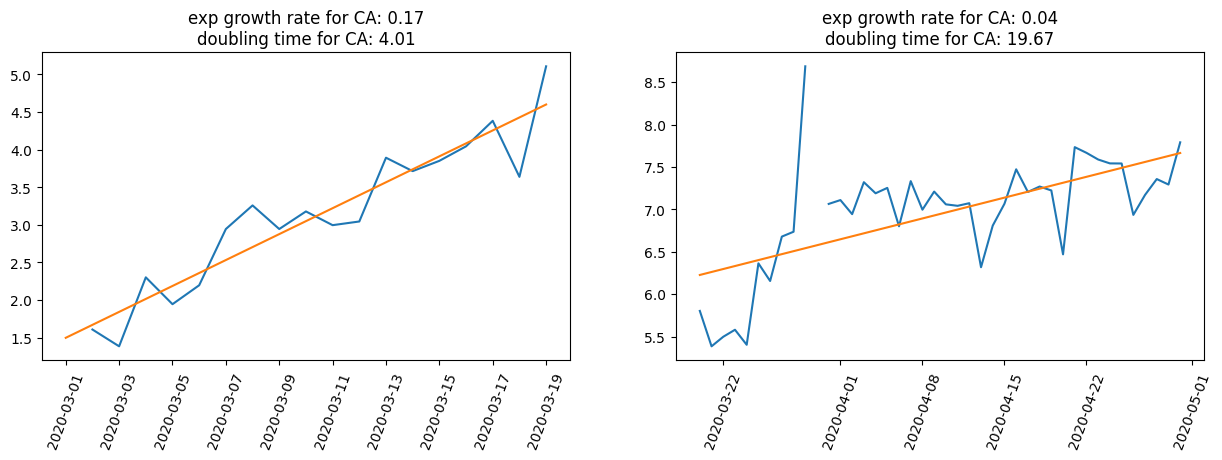

In [14]:
# 03/01/2020-03/19/2020 to 03/20/2020-04/30/2020 and ask if doubling times are different
from matplotlib import pyplot as plt
import numpy as np
query = ("https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD")
x = pd.read_csv(query)
x['date']=pd.to_datetime(x['submission_date'])
x = x.sort_values(by='date')
x.set_index(['date'],inplace=True)
# clean data, replace zeros / negatives with 'None'
# this will represent missing data for us
mask = x['new_case'] < 1
x.loc[mask, 'new_case'] = None
x.head()


print('The exponential growth rate decreased and the doubling time increased after the lockdown implementation')
print('This is supports that the state-wide lockdown did have an effect on the rate of transmission.')

march = x.loc['2020-03-01':'2020-03-19']
march_april = x.loc['2020-03-20':'2020-04-30']
state = 'CA'
data = [march, march_april]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
i = 0
for z in data:
    ca_log = np.log(z[z['state'] == state]['new_case']) # log tranform counts
    idx = np.isfinite(ca_log) 
    day = np.linspace(1,len(ca_log),len(ca_log)) # make array of day numbers
    slope, intercept = np.polyfit(day[idx],ca_log[idx],1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(ca_log.index,ca_log) # plot log(cases)
    ax[i].plot(ca_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    ax[i].set_title(f"exp growth rate for {state}: {round(slope,2)}\ndoubling time for {state}: {round(0.69/slope, 2)}")
    i+=1
    

The exponential growth rate decreased and the doubling time increased after the lockdown implementation
This is supports that the state-wide lockdown did have an effect on the rate of transmission.


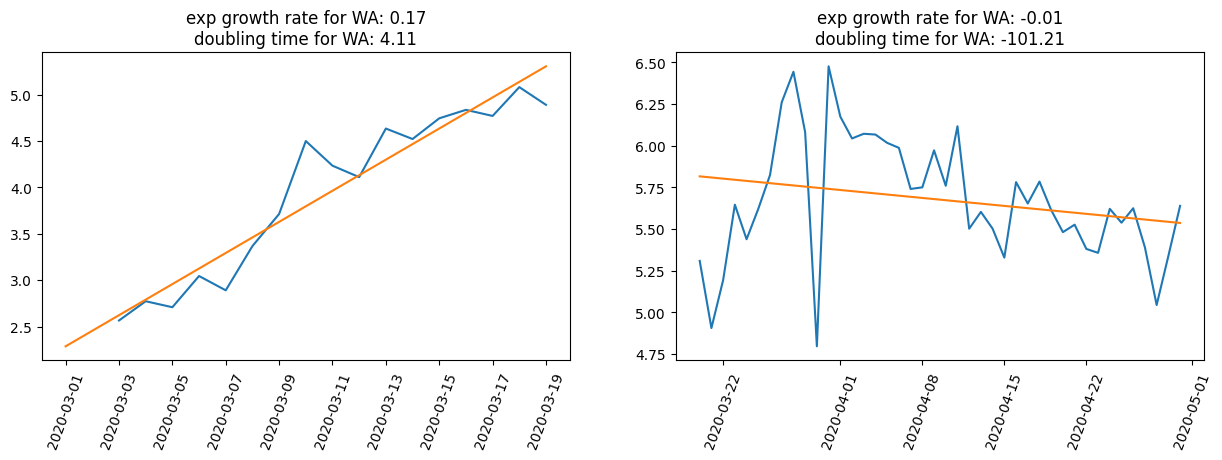

In [15]:
# 02/15/2020-03/24/2020 to 03/25/2020-04/30/2020. Did the lockdown change the rate of transmission?

febMarch = x.loc['2020-03-01':'2020-03-19']
marchApril = x.loc['2020-03-20':'2020-04-30']
state = 'WA'
data = [febMarch, marchApril]

print('The exponential growth rate decreased and the doubling time increased after the lockdown implementation')
print('This is supports that the state-wide lockdown did have an effect on the rate of transmission.')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
i = 0
for z in data:
    ca_log = np.log(z[z['state'] == state]['new_case']) # log tranform counts
    idx = np.isfinite(ca_log) 
    day = np.linspace(1,len(ca_log),len(ca_log)) # make array of day numbers
    slope, intercept = np.polyfit(day[idx],ca_log[idx],1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(ca_log.index,ca_log) # plot log(cases)
    ax[i].plot(ca_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    ax[i].set_title(f"exp growth rate for {state}: {round(slope,2)}\ndoubling time for {state}: {round(0.69/slope, 2)}")
    i+=1